In [1]:
from random import random
from functools import reduce
from collections import namedtuple
from queue import PriorityQueue, SimpleQueue, LifoQueue
import matplotlib.pyplot as plt
from scipy.special import softmax
import numpy as np
from random import seed

In [2]:
def goal_check(state):
    return np.all(reduce(np.logical_or, [SETS[i] for i in state.taken], np.array([False for _ in range(PROBLEM_SIZE)])))

In [3]:
def frequencies(A):
  return np.sum(A, axis=0)


In [4]:
def rank_0(A):
  return np.sum(A, axis=1)


Generate instance

In [12]:
seed(1)

In [19]:
PROBLEM_SIZE = 10
NUM_SETS = 20
SETS = tuple(np.array([random() < .3 for _ in range(PROBLEM_SIZE)]) for _ in range(NUM_SETS))
State = namedtuple('State', ['taken', 'not_taken'])

Check whether this instance has a solution or not

In [20]:
assert goal_check(State(set(range(NUM_SETS)), set())), "Problem not solvable"

Plot it

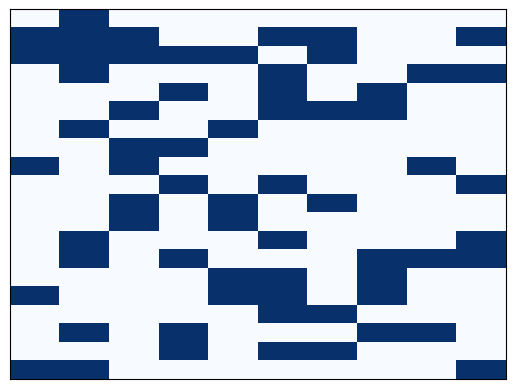

In [21]:
plt.imshow(SETS, cmap='Blues', aspect='auto', extent=[0, PROBLEM_SIZE, 0, NUM_SETS])
#plt.yticks([])  # Hide y-axis ticks
plt.xticks([])  # Hide x-axis ticks
plt.yticks([])
plt.show()

Convert the tuple to a matrix to operate faster

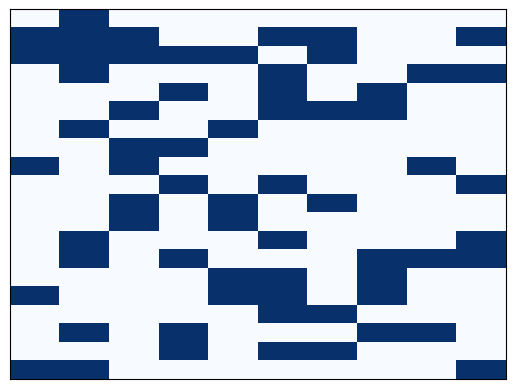

In [22]:
numeric_sets = np.array(SETS, dtype=int)

plt.imshow(numeric_sets, cmap='Blues', aspect='auto', extent=[0, PROBLEM_SIZE, 0, NUM_SETS])
plt.xticks([])  # Hide x-axis ticks
plt.yticks([])  # Hide y-axis ticks
plt.show()

Plotted again just to check

Here we have the Heuristic

In [23]:
tiles=0
cs=State(set(), set(range(NUM_SETS)))
while not goal_check(cs):
  tiles+=1
  freq=frequencies(numeric_sets)
  print(freq)
  card=rank_0(numeric_sets)
  print(card)
  weights=(100-freq)*0.01
  print(weights)
  rank=card+np.dot(numeric_sets,weights)
  print(rank)
  action=np.argmax(rank,axis =0)
  print(f"{action},{rank[action]}")
  remove=np.argwhere(numeric_sets[action] == 1)
  remove
  #numeric_sets=np.delete(numeric_sets,action, axis=0)
  numeric_sets=np.delete(numeric_sets,remove,axis=1)
  cs=State(cs.taken ^ {action},cs.not_taken ^ {action})


[ 5  9  7  7  6 10  6  6  4  6]
[1 6 6 4 3 4 2 2 3 3 3 2 3 5 3 4 2 4 3 3]
[0.95 0.91 0.93 0.93 0.94 0.9  0.94 0.94 0.96 0.94]
[ 1.91 11.57 11.6   7.71  5.77  7.71  3.85  3.86  5.84  5.77  5.81  3.87
  5.75  9.68  5.78  7.73  3.84  7.74  5.77  5.8 ]
2,11.600000000000001
[10  6  4  6]
[0 2 0 3 2 2 0 0 1 2 0 0 2 3 2 2 1 2 1 1]
[0.9  0.94 0.96 0.94]
[0.   3.84 0.   5.8  3.84 3.84 0.   0.   1.96 3.84 0.   0.   3.84 5.84
 3.84 3.84 1.9  3.9  1.9  1.94]
13,5.84
[10]
[0 1 0 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 1 0]
[0.9]
[0.  1.9 0.  1.9 1.9 1.9 0.  0.  0.  1.9 0.  0.  1.9 0.  1.9 1.9 1.9 0.
 1.9 0. ]
1,1.9


In [24]:
print(tiles,cs.taken)

3 {1, 2, 13}
